# Ordinary Least Squares

In [0]:
%matplotlib inline

!pip install statsmodels 
from __future__ import print_function
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(9876789)

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## OLS estimation (OLS 추정)

가상적인 데이터(Artificial data)를 이용하여 OLS를 연습한다. 우리의 모형은 다음과 같다. 

$$y = X \beta + e $$

일단 첫번째 단계로 다음 데이터를 생성해보자. 샘플 숫자는 편의상 100개로 하자(nsample = 100) .

$$X, \beta, e$$

In [0]:
nsample = 100 # 표본의 크기는 100으로 한다. 
x = np.linspace(0, 10, 100) # 0에서 10까지 숫자를 100구간으로 나눈다 (Try print(x.size))
X = np.column_stack((x, x**2)) # x와 x**2 (x 제곱) 항을 이용 독립변수들을 만든다
beta = np.array([1, 0.1, 10]) # beta는 종속변수와 독립변수를 연결하는 관찰할 수 없는 함수
e = np.random.normal(size=nsample) # 현실의 관측치에 더해줄 에러

회귀분석에서는 상수항을 더해주는 것이 보통이다. 따라서 *X*는 다음과 같이 된다. 

$$X = (1, \vec{x}, \vec{x}^2) $$

In [0]:
X = sm.add_constant(X)
print(X[0:5,]) # X의 첫번째 5행을 확인
y = np.dot(X, beta) + e # 이와 같이 데이터를 만들고 beta를 추정하고자 한다. 

[[1.         0.         0.        ]
 [1.         0.1010101  0.01020304]
 [1.         0.2020202  0.04081216]
 [1.         0.3030303  0.09182736]
 [1.         0.4040404  0.16324865]]


beta를 추정하기 위하여 OLS 모형을 사용한다. 

$$\hat{\beta} = (X'X)^{-1}X'y $$


In [0]:
model = sm.OLS(y, X) # 위 수식에 따른 OLS 모형 수립
results = model.fit() # 추정(estimation)
print(results.summary()) # 추정결과를 요약하여 보여주기

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.020e+06
Date:                Mon, 15 Apr 2019   Prob (F-statistic):          2.83e-239
Time:                        08:05:00   Log-Likelihood:                -146.51
No. Observations:                 100   AIC:                             299.0
Df Residuals:                      97   BIC:                             306.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3423      0.313      4.292      0.0

우리가 관심이 있는 추정된 beta를 숨겨진 진짜 beta와 비교해보자. 그리고 모형이 얼마나 데이터를 잘 맞추었는지( goodness of fit) R2 들을 살펴보자. 샘플 규모가 작아서 정확한 추정이 안된다. 그러나 샘플 규모를 늘리면 점점 더 정확한 모형이 된다. 

In [0]:
print('True Parameters: ', beta) # 우리는 이걸 관찰할 수 없다고 가정한다
print('Parameters: ', results.params) # 우리가 데이터에서 추정한 숫자다
print('R2: ', results.rsquared)
print('Adjusted R2: ', results.rsquared_adj)

True Parameters:  [ 1.   0.1 10. ]
Parameters:  [ 1.34233516 -0.04024948 10.01025357]
R2:  0.9999879365025871
Adjusted R2:  0.9999876877706817


## OLS로 비선형함수 추정하기

OLS는 매우 유연한 모형이다. 비선형함수도 OLS로 추정이 가능하다. 이를 위해서 x와 y간 비선형 함수를 시뮬레이션한 후 그 관계를 다시 추정해보자. 먼저 다음 식을 시뮬레이션을 한다. 

$$ y_i = 0.5*x_i +0.5*sin(x_i) -0.02*(x_i - 5)^2 + \epsilon$$
$$ i = 1, \cdots , 50 $$
$$ \epsilon \sim N(0, 0.5^2) $$

데이터 과학자는 위 관계를 모른다고 가정한다. 단지 *y*와 *X*를 관찰한 후 관계를 통계적으로 추정하고자 한다. 

In [0]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]

y_true = np.dot(X, beta) # 노이즈가 없는 y
y = y_true + sig * np.random.normal(size=nsample) # 측정오차 등 감안한 노이즈 추가

OLS로 관계를 추정해보자. 

In [0]:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     211.8
Date:                Mon, 15 Apr 2019   Prob (F-statistic):           6.30e-27
Time:                        08:05:01   Log-Likelihood:                -34.438
No. Observations:                  50   AIC:                             76.88
Df Residuals:                      46   BIC:                             84.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4687      0.026     17.751      0.0

관심이 있는 추정치들을 살펴보자. 우리가 추정한 계수, 표준에러(standard errors), 그리고 우리가 예측한 *y*값들을 살펴보자. 데이터 과학자들은 표준에러 크기가 계수의 1/2 이하면 계수가 통계적으로 의미있다고 보는 경향이 있다. 계수와 표준에러의 비율이 t값(t-value)라고 하는데 마찬가지로 t 값의 절대값이 2보다 크면 통계적으로 의미있다고 보는 경향이 있다. 

In [0]:
print('Parameters: ', res.params)
print('Standard errors: ', res.bse)
print('t-values: ', res.tvalues)
print('Predicted values: ', res.predict())

Parameters:  [ 0.46872448  0.48360119 -0.01740479  5.20584496]
Standard errors:  [0.02640602 0.10380518 0.00231847 0.17121765]
t-values:  [17.75066497  4.65873853 -7.50702251 30.40483804]
Predicted values:  [ 4.77072516  5.22213464  5.63620761  5.98658823  6.25643234  6.44117491
  6.54928009  6.60085051  6.62432454  6.6518039   6.71377946  6.83412169
  7.02615877  7.29048685  7.61487206  7.97626054  8.34456611  8.68761335
  8.97642389  9.18997755  9.31866582  9.36587056  9.34740836  9.28893189
  9.22171529  9.17751587  9.1833565   9.25708583  9.40444579  9.61812821
  9.87897556 10.15912843 10.42660281 10.65054491 10.8063004  10.87946503
 10.86825119 10.78378163 10.64826203 10.49133265 10.34519853 10.23933827
 10.19566084 10.22490593 10.32487947 10.48081414 10.66779556 10.85485568
 11.01006072 11.10575781]


실제 y와 우리가 추정한 y를 비교해보자. ``wls_prediction_std`` command 를 이용하여 신뢰구간도 표시해보자. 

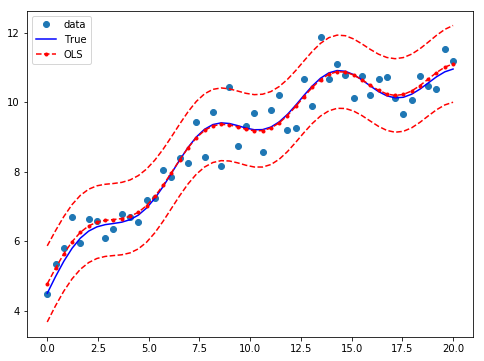

In [0]:
prstd, iv_l, iv_u = wls_prediction_std(res) #추정값, 신뢰구간 상단과 하단

fig, ax = plt.subplots(figsize=(8,6)) # 그림 크기 지정

ax.plot(x, y, 'o', label="data") # 데이터는 동그라미로 표시
ax.plot(x, y_true, 'b-', label="True") # 파라선으로 실제값 표시
ax.plot(x, res.fittedvalues, 'r--.', label="OLS") # 빨간 점선으로 추정값 표시
ax.plot(x, iv_u, 'r--') # 신뢰구간 상단
ax.plot(x, iv_l, 'r--') # 신뢰구간 하단
ax.legend(loc='best') # 범례(legend) 삽입

## 더미변수 (dummy variables)

우리의 가상적인 데이터에는 3개의 그룹이 있다: Group 0, Group 1, Group 2. Group 0를 기본 사례(base case)로 가정하고 Group 1과 Group 2가 Group 0와 어떻게 다른지 살펴보자. 

In [0]:
nsample = 50
groups = np.zeros(nsample, int)
groups[20:40] = 1
groups[40:] = 2
#dummy = (groups[:,None] == np.unique(groups)).astype(float)

dummy = sm.categorical(groups, drop=True) # 그룹 이름은 굳이 필요 없으므로 drop하고 더미변수 생성
# print(dummy)
x = np.linspace(0, 20, nsample)
# drop reference category
X = np.column_stack((x, dummy[:,1:])) # 기본사례는 제외
X = sm.add_constant(X, prepend=False) # 상수항을 마지막으로 

beta = [1., 3, -3, 10]
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + e

데이터를 검사한다. 

In [0]:
print(X[:5,:])
print(y[:5])
print(groups)
print(dummy[:5,:])

[[0.         0.         0.         1.        ]
 [0.40816327 0.         0.         1.        ]
 [0.81632653 0.         0.         1.        ]
 [1.2244898  0.         0.         1.        ]
 [1.63265306 0.         0.         1.        ]]
[ 9.28223335 10.50481865 11.84389206 10.38508408 12.37941998]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


모형을 추정하고 결과를 본다. 

In [0]:
res2 = sm.OLS(y, X).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     671.7
Date:                Mon, 15 Apr 2019   Prob (F-statistic):           5.69e-38
Time:                        08:05:01   Log-Likelihood:                -64.643
No. Observations:                  50   AIC:                             137.3
Df Residuals:                      46   BIC:                             144.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9999      0.060     16.689      0.0

참관계(true relationship)과 추정된 관계(estimated relationship를 비교해보자. 

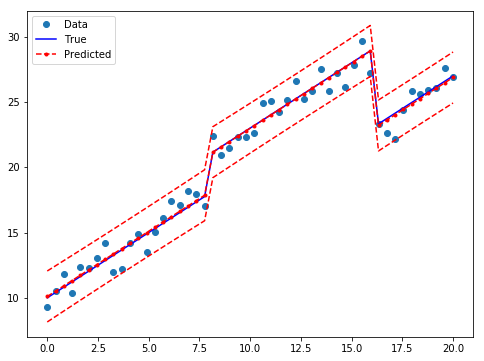

In [0]:
prstd, iv_l, iv_u = wls_prediction_std(res2)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="Data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res2.fittedvalues, 'r--.', label="Predicted")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
legend = ax.legend(loc="best")

이하는 고급과정이므로 관심이 있는 학생은 스스로 공부한다. 

## Joint hypothesis test

### F test

We want to test the hypothesis that both coefficients on the dummy variables are equal to zero, that is, $R \times \beta = 0$. An F test leads us to strongly reject the null hypothesis of identical constant in the 3 groups:

In [0]:
R = [[0, 1, 0, 0], [0, 0, 1, 0]]
print(np.array(R))
print(res2.f_test(R))

[[0 1 0 0]
 [0 0 1 0]]
<F test: F=array([[145.49268198]]), p=1.2834419617281953e-20, df_denom=46, df_num=2>


You can also use formula-like syntax to test hypotheses

In [0]:
print(res2.f_test("x2 = x3 = 0"))

<F test: F=array([[145.49268198]]), p=1.2834419617282134e-20, df_denom=46, df_num=2>


### Small group effects

If we generate artificial data with smaller group effects, the T test can no longer reject the Null hypothesis: 

In [0]:
beta = [1., 0.3, -0.0, 10]
y_true = np.dot(X, beta)
y = y_true + np.random.normal(size=nsample)

res3 = sm.OLS(y, X).fit()

In [0]:
print(res3.f_test(R))

<F test: F=array([[1.22491119]]), p=0.3031864410631272, df_denom=46, df_num=2>


In [0]:
print(res3.f_test("x2 = x3 = 0"))

<F test: F=array([[1.22491119]]), p=0.3031864410631272, df_denom=46, df_num=2>


### Multicollinearity

The Longley dataset is well known to have high multicollinearity. That is, the exogenous predictors are highly correlated. This is problematic because it can affect the stability of our coefficient estimates as we make minor changes to model specification. 

In [0]:
from statsmodels.datasets.longley import load_pandas
y = load_pandas().endog
X = load_pandas().exog
X = sm.add_constant(X)

Fit and summary:

In [0]:
ols_model = sm.OLS(y, X)
ols_results = ols_model.fit()
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                Mon, 15 Apr 2019   Prob (F-statistic):           4.98e-10
Time:                        08:05:02   Log-Likelihood:                -109.62
No. Observations:                  16   AIC:                             233.2
Df Residuals:                       9   BIC:                             238.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.482e+06    8.9e+05     -3.911      0.0

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


#### Condition number

One way to assess multicollinearity is to compute the condition number. Values over 20 are worrisome (see Greene 4.9). The first step is to normalize the independent variables to have unit length: 

In [0]:
norm_x = X.values
for i, name in enumerate(X):
    if name == "const":
        continue
    norm_x[:,i] = X[name]/np.linalg.norm(X[name])
norm_xtx = np.dot(norm_x.T,norm_x)

Then, we take the square root of the ratio of the biggest to the smallest eigen values. 

In [0]:
eigs = np.linalg.eigvals(norm_xtx)
condition_number = np.sqrt(eigs.max() / eigs.min())
print(condition_number)

56240.87037739987


#### Dropping an observation

Greene also points out that dropping a single observation can have a dramatic effect on the coefficient estimates: 

In [0]:
ols_results2 = sm.OLS(y.iloc[:14], X.iloc[:14]).fit()
print("Percentage change %4.2f%%\n"*7 % tuple([i for i in (ols_results2.params - ols_results.params)/ols_results.params*100]))

Percentage change 4.55%
Percentage change -2228.01%
Percentage change 154304695.31%
Percentage change 1366329.02%
Percentage change 1112549.36%
Percentage change 92708715.91%
Percentage change 817944.26%



We can also look at formal statistics for this such as the DFBETAS -- a standardized measure of how much each coefficient changes when that observation is left out.

In [0]:
infl = ols_results.get_influence()

In general we may consider DBETAS in absolute value greater than $2/\sqrt{N}$ to be influential observations

In [0]:
2./len(X)**.5

0.5

In [0]:
print(infl.summary_frame().filter(regex="dfb"))

    dfb_const  dfb_GNPDEFL       dfb_GNP     dfb_UNEMP     dfb_ARMED  \
0   -0.016406  -169.822675  1.673981e+06  54490.318088  51447.824036   
1   -0.020608  -187.251727  1.829990e+06  54495.312977  52659.808664   
2   -0.008382   -65.417834  1.587601e+06  52002.330476  49078.352378   
3    0.018093   288.503914  1.155359e+06  56211.331922  60350.723082   
4    1.871260  -171.109595  4.498197e+06  82532.785818  71034.429294   
5   -0.321373  -104.123822  1.398891e+06  52559.760056  47486.527649   
6    0.315945  -169.413317  2.364827e+06  59754.651394  50371.817827   
7    0.015816   -69.343793  1.641243e+06  51849.056936  48628.749338   
8   -0.004019   -86.903523  1.649443e+06  52023.265116  49114.178265   
9   -1.018242  -201.315802  1.371257e+06  56432.027292  53997.742487   
10   0.030947   -78.359439  1.658753e+06  52254.848135  49341.055289   
11   0.005987  -100.926843  1.662425e+06  51744.606934  48968.560299   
12  -0.135883   -32.093127  1.245487e+06  50203.467593  51148.37

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:309: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:323: RuntimeWarning: invalid value encountered in sqrt
  dffits_ = self.resid_studentized_internal * np.sqrt(hii / (1 - hii))
/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:352: RuntimeWarni